# Exploratory Data Analysis (EDA)
---

0. **[Introduction to Exploratory Data Analysis](#Introduction-to-EDA)**
1. **[Discovery](#1.-Discovery)**
2. **[Structuring](#2.-Structuring)**
3. **[Cleaning](#3.-Cleaning)**
4. **[Joining](#4.-Joining)**
5. **[Validating](#5.-Validating)**
6. **[Presenting](#6.-Presenting)**

---
<a name="Introduction-to-EDA"></a>
### Introduction to Exploratory Data Analysis

**Exploratory Data Analysis (EDA) |** The process of investigating, organizing, and analyzing datasets and summarizing their main characteristics, often employing data wrangling and visualization methods.

**6 Practices of EDA:**
- **Discovering |** process of data familiarization in order to conceptualize how the data can be used
- **Structuring |** the process of taking raw data and organizing or transforming it to be more easily visualized, explained, or modeled 
- **Cleaning |** the process of removing errors that may distort your data or make it less useful
- **Joining |** the process of augmenting or adjusting data by adding values from other datasets
- **Validating |** the process of verifying that the data is consistent and high quality
- **Presenting |** making the cleaned dataset or data visualizations available to others for analysis or further modeling


---
<a name="1.-Discovery"></a>
### 1. Discovery

#### 1.1 Reference Guide

**Question to ask during the discovery phase:**
1. How can I break this data into smaller groups so that I can understand it better?
2. How can I prove my hypothesis?
3. In its current form, can this data give me the answers I need?

**Functions for data discovery:**

| Function | Description |
| ---- | ---- |
| `DataFrame.head()` | The head() method will display the first n rows of the dataframe. <br> In the argument field, input the number of rows you want displayed in a Python notebook. The default is 5 rows. |
| `DataFrame.info(X)` | The info() method will display a summary of the dataframe, including the range index, dtypes, column headers, and memory usage.<br> Leaving the argument field blank will return a full summary. As an option, in the argument field you can type in show_counts=True, which will return the count of non-null values for each column. |
| `DataFrame.describe()` | The describe() method will return descriptive statistics of the entire dataset, including total count, mean, minimum, maximum, dispersion, and distribution. <br> Leaving the argument field blank will default to returning a summary of the data frame’s statistics. As an option, you can use “include=[X]” and “exclude=[X]” which will limit the results to specific data types, depending on what you input in the brackets. | 
| `DataFrame.shape` | shape is an attribute that returns a tuple representing the dimensions of the dataframe by number of rows and columns. Remember that attributes are not followed by parentheses. |

#### 1.2 Code Cells

##### 1.2.1 Import packages

In [59]:
import os
import re
from datetime import datetime

# For data manipulation
import numpy as np
import pandas as pd
import geopandas as gpd 

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)



In [2]:
os.getcwd()

'C:\\Users\\ah5766\\AppData\\Local\\Programs\\Microsoft VS Code'

##### 1.2.2 Load Data

In [3]:
bridge = r"C:\Users\ah5766\OneDrive - Halff\Documents\Code\lp_offsystem_bridges.json"
gdf = gpd.read_file(bridge)
gdf = gdf.drop(columns = 'OBJECTID')
gdf


,Name,Class,Lat,Lon,geometry
0,000031-George Mashon,Concrete,30.629598,-90.577166,POINT (-90.57717 30.6296)
1,000089-Buddy Ellis New,Concrete,30.454078,-90.863819,POINT (-90.86382 30.45408)
2,101002-Satsuma Quad,Concrete,30.437562,-90.788728,POINT (-90.78873 30.43756)
3,101006-Forrest Delatte New,Concrete,30.456467,-90.931399,POINT (-90.9314 30.45647)
4,101009-Wax,Concrete,30.444766,-90.925008,POINT (-90.92501 30.44477)
...,...,...,...,...,...
76,620305-Ginny,TTTRES,30.431383,-90.594493,POINT (-90.59449 30.43138)
77,620309-Palmer,TTTRES,30.358298,-90.776048,POINT (-90.77605 30.3583)
78,620327-Miller,TTTRES,30.361567,-90.694338,POINT (-90.69434 30.36157)
79,620357-Dunn,TTTRES,30.505145,-90.921598,POINT (-90.9216 30.50514)


In [4]:
# Directory you want to crawl
directory_path = r"C:\Users\ah5766\OneDrive - Halff\Livingston Parish GIS Data\Bridges\Parish-Owned Bridges - 2022"

# Initialize a list to store the matched folder paths
matched_folders = []

# Function to get the identifier from a string
def get_identifier(name):
    match = re.match(r"(\d{6})", name)
    return match.group(0) if match else None

# Function to find matching folders by identifier
def find_matching_folder(identifier):
    for root, dirs, files in os.walk(directory_path):
        for dir_name in dirs:
            dir_identifier = get_identifier(dir_name)
            if dir_identifier == identifier:
                return os.path.join(root, dir_name)
    return None

# Iterate over each row in the GeoDataFrame
for idx, row in gdf.iterrows():
    # Get the identifier from the 'Name' field (adjust field name if different)
    name_value = row['Name']
    name_identifier = get_identifier(name_value)
    
    if name_identifier:
        # Find a matching folder path based on identifier
        matched_folder = find_matching_folder(name_identifier)
    else:
        matched_folder = None
    
    # Append the result to the list (or None if no match found)
    matched_folders.append(matched_folder)

gdf['Folder'] = matched_folders
gdf

,Name,Class,Lat,Lon,geometry,Folder
0,000031-George Mashon,Concrete,30.629598,-90.577166,POINT (-90.57717 30.6296),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
1,000089-Buddy Ellis New,Concrete,30.454078,-90.863819,POINT (-90.86382 30.45408),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
2,101002-Satsuma Quad,Concrete,30.437562,-90.788728,POINT (-90.78873 30.43756),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
3,101006-Forrest Delatte New,Concrete,30.456467,-90.931399,POINT (-90.9314 30.45647),None
4,101009-Wax,Concrete,30.444766,-90.925008,POINT (-90.92501 30.44477),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
...,...,...,...,...,...,...
76,620305-Ginny,TTTRES,30.431383,-90.594493,POINT (-90.59449 30.43138),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
77,620309-Palmer,TTTRES,30.358298,-90.776048,POINT (-90.77605 30.3583),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
78,620327-Miller,TTTRES,30.361567,-90.694338,POINT (-90.69434 30.36157),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
79,620357-Dunn,TTTRES,30.505145,-90.921598,POINT (-90.9216 30.50514),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...


In [5]:
# Manually update the fourth item with the specific folder path
if len(matched_folders) > 3 and matched_folders[3] is None:
    matched_folders[3] = r"C:\Users\ah5766\OneDrive - Halff\Livingston Parish GIS Data\Bridges\Parish-Owned Bridges - 2022\101007 - Forrest Delatte Rd"

gdf['Folder'] = matched_folders
gdf

,Name,Class,Lat,Lon,geometry,Folder
0,000031-George Mashon,Concrete,30.629598,-90.577166,POINT (-90.57717 30.6296),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
1,000089-Buddy Ellis New,Concrete,30.454078,-90.863819,POINT (-90.86382 30.45408),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
2,101002-Satsuma Quad,Concrete,30.437562,-90.788728,POINT (-90.78873 30.43756),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
3,101006-Forrest Delatte New,Concrete,30.456467,-90.931399,POINT (-90.9314 30.45647),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
4,101009-Wax,Concrete,30.444766,-90.925008,POINT (-90.92501 30.44477),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
...,...,...,...,...,...,...
76,620305-Ginny,TTTRES,30.431383,-90.594493,POINT (-90.59449 30.43138),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
77,620309-Palmer,TTTRES,30.358298,-90.776048,POINT (-90.77605 30.3583),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
78,620327-Miller,TTTRES,30.361567,-90.694338,POINT (-90.69434 30.36157),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...
79,620357-Dunn,TTTRES,30.505145,-90.921598,POINT (-90.9216 30.50514),C:\Users\ah5766\OneDrive - Halff\Livingston Pa...


In [6]:
def extract_after_substring(full_string, substring):
    # Skip None values
    if full_string is None:
        return ""  # or simply return None if you prefer

    start_index = full_string.find(substring)
    if start_index != -1:
        # Extract everything after the substring
        result = full_string[start_index + len(substring):]
        # Remove leading backslashes (if any)
        return result.lstrip('\\')
    else:
        return "Substring not found"


In [7]:
substring = "C:\\Users\\ah5766\\OneDrive - Halff"
gdf['Folder'] = gdf['Folder'].apply(lambda x: extract_after_substring(x, substring)) # Split out the unqualified directory path from the root 
gdf['Recall No.'] = gdf['Name'].str.extract(r'^(\d{6})') # Extract the Recall No. for eventual join

In [98]:
# Load the dataset into a DataFrame and save in a variable
dtype_dict = {'Recall No.':str, # Force pandas to read the Recall No. as a string so as to not drop the leading zeros
              'Year Built':str,
              #'φc Deck': int,
              #'φc Super': int,
              'φc Sub (Culvert Condition Factor)': float,
              'φc Min': float, 
              'Posting (Rating)':str,
              'Posting (Signed)':str} 
df0 = pd.read_excel(r"C:\Users\ah5766\OneDrive - Halff\Documents\Projects (not spatial)\LP\livingstonparish_bridgelist_ranked.xlsx", dtype=dtype_dict)
df0 = df0.sort_values('Recall No.')
df0['Data QA/QC'] = 'Initial Pass' # Add in a new Data QA/QC field and intially populate it with a value
df0.dtypes

Recall No.                            object
Road Name                             object
Crossing                              object
Priority                             float64
Bridge Type                           object
Pile Type                             object
Length                                object
Year Built                            object
ADT (IR)                               int64
φc Deck                              float64
φc Super                             float64
φc Sub (Culvert Condition Factor)    float64
φc Min                               float64
Rated By                              object
Posting (Rating)                      object
Posting (Signed)                      object
Data QA/QC                            object
dtype: object

In [99]:
merged_gdf = gdf.merge(df0, on='Recall No.', how='outer')
merged_gdf

,Name,Class,Lat,Lon,geometry,Folder,Recall No.,Road Name,Crossing,Priority,Bridge Type,Pile Type,Length,Year Built,ADT (IR),φc Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Rated By,Posting (Rating),Posting (Signed),Data QA/QC
0,000031-George Mashon,Concrete,30.629598,-90.577166,POINT (-90.57717 30.6296),Livingston Parish GIS Data\Bridges\Parish-Owne...,000031,George Mashon,Little Natalbany River,0.370,COSLAB,Concrete,125',2020,127.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,Initial Pass
1,000032-Travis,Boxes,30.493126,-90.858601,POINT (-90.8586 30.49313),Livingston Parish GIS Data\Bridges\Parish-Owne...,000032,Travis St,Dumplin Creek,0.233,COPBOX,NaN,27',2020,812.0,NaN,NaN,9.0,9.0,NaN,NaN,NaN,Initial Pass
2,000089-Buddy Ellis New,Concrete,30.454078,-90.863819,POINT (-90.86382 30.45408),Livingston Parish GIS Data\Bridges\Parish-Owne...,000089,Buddy Ellis Rd,Canal,1.093,COPCSS,Concrete,60',2020,6522.0,9.0,9.0,9.0,9.0,DOTD,NaN,NaN,Initial Pass
3,NaN,NaN,NaN,NaN,None,NaN,000096,Whittington Rd,Grays Creek,0.703,COSLAB,Concrete,120',2020,300.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,Initial Pass
4,101002-Satsuma Quad,Concrete,30.437562,-90.788728,POINT (-90.78873 30.43756),Livingston Parish GIS Data\Bridges\Parish-Owne...,101002,S Satsuma Rd,Colyell Creek,1.477,CPQCCD,Concrete,120',2013,2100.0,8.0,8.0,7.0,7.0,F&T,NaN,NaN,Initial Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,620367-John Barber Box,Boxes,30.549388,-90.706510,POINT (-90.70651 30.54939),Livingston Parish GIS Data\Bridges\Parish-Owne...,620367,John Barber Rd,Mars Branch,0.877,COPBOX,NaN,33',2018,300.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN,Initial Pass
79,620372-Satsuma,Concrete,30.479855,-90.795180,POINT (-90.79518 30.47985),Livingston Parish GIS Data\Bridges\Parish-Owne...,620372,South Satsuma,Hornsby Creek,1.249,COPCSS,Concrete,140',2018,3615.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,Initial Pass
80,620373-Linder Box,Boxes,30.509165,-90.935349,POINT (-90.93535 30.50917),Livingston Parish GIS Data\Bridges\Parish-Owne...,620373,Linder Rd,Canal,1.023,COPBOX,NaN,27',2020,3615.0,NaN,NaN,9.0,9.0,F&T,NaN,NaN,Initial Pass
81,NaN,NaN,NaN,NaN,None,NaN,623204,Forrest Delatte Rd,Grays Creek,1.095,COPCSS,Concrete,100',2022,800.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,Initial Pass


In [100]:
# Cleanup mismatched joins manually by index position 
source_index = 54
target_index = 3
cols = ['Name', 'Class', 'Lat', 'Lon', 'geometry', 'Folder']
merged_gdf.loc[target_index, cols] = merged_gdf.loc[source_index, cols]

# Cleanup mismatched joins manually by index position 
source_index = 5
target_index = 81
cols = ['Name', 'Class', 'Lat', 'Lon', 'geometry', 'Folder']
merged_gdf.loc[target_index, cols] = merged_gdf.loc[source_index, cols]

# Assign new values to the Data QA/QC field for the rows we cleaned
merged_gdf.at[3, "Data QA/QC"] = 'Potential mismatch in Recall No., No documentation available'
merged_gdf.at[81, "Data QA/QC"] = 'Potential mismatch in Recall No.'

# Drop the rows we used to populate the missing values
merged_gdf = merged_gdf.drop(index=[5,54])


In [101]:
# Define a function to handle both range, single values, and text entries
def split_range(range_str):
    if pd.isnull(range_str):
        return (None, None)
    
    # Split on hyphen if present, otherwise assume a single value
    try:
        if '-' in range_str:
            min_val, max_val = map(str.strip, range_str.split('-'))
        else:
            min_val = max_val = range_str.strip()

        # Attempt to convert string parts to integers
        return int(min_val), int(max_val)
    except ValueError:
        # Return None for non-integer or unconvertible strings
        return (None, None)

In [102]:
merged_gdf['Year Built (dt)'] = pd.to_datetime(merged_gdf['Year Built'],format="%Y") # Turn the Year Built into a date time representation
merged_gdf['Year Built (int)'] = merged_gdf['Year Built'].astype(int) # Turn the Year Built into an integer

merged_gdf['Length (ft)'] = merged_gdf['Length'].str.replace("'","").astype(int) # Turn the Length field into an integer representation by replacing the ' character

merged_gdf[['Minimum Posting (Rating)','Maximum Posting (Rating)']] = merged_gdf['Posting (Rating)'].apply(split_range).apply(pd.Series)
merged_gdf[['Minimum Posting (Signed)','Maximum Posting (Signed)']] = merged_gdf['Posting (Signed)'].apply(split_range).apply(pd.Series)

bridge_gdf = merged_gdf.reset_index(drop=True)
bridge_gdf

,Name,Class,Lat,Lon,geometry,Folder,Recall No.,Road Name,Crossing,Priority,Bridge Type,Pile Type,Length,Year Built,ADT (IR),φc Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Rated By,Posting (Rating),Posting (Signed),Data QA/QC,Year Built (dt),Year Built (int),Length (ft),Minimum Posting (Rating),Maximum Posting (Rating),Minimum Posting (Signed),Maximum Posting (Signed)
0,000031-George Mashon,Concrete,30.629598,-90.577166,POINT (-90.57717 30.6296),Livingston Parish GIS Data\Bridges\Parish-Owne...,000031,George Mashon,Little Natalbany River,0.370,COSLAB,Concrete,125',2020,127.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,Initial Pass,2020-01-01,2020,125,NaN,NaN,NaN,NaN
1,000032-Travis,Boxes,30.493126,-90.858601,POINT (-90.8586 30.49313),Livingston Parish GIS Data\Bridges\Parish-Owne...,000032,Travis St,Dumplin Creek,0.233,COPBOX,NaN,27',2020,812.0,NaN,NaN,9.0,9.0,NaN,NaN,NaN,Initial Pass,2020-01-01,2020,27,NaN,NaN,NaN,NaN
2,000089-Buddy Ellis New,Concrete,30.454078,-90.863819,POINT (-90.86382 30.45408),Livingston Parish GIS Data\Bridges\Parish-Owne...,000089,Buddy Ellis Rd,Canal,1.093,COPCSS,Concrete,60',2020,6522.0,9.0,9.0,9.0,9.0,DOTD,NaN,NaN,Initial Pass,2020-01-01,2020,60,NaN,NaN,NaN,NaN
3,620018-Whittington,Concrete,30.418949,-90.916631,POINT (-90.91663 30.41895),,000096,Whittington Rd,Grays Creek,0.703,COSLAB,Concrete,120',2020,300.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,"Potential mismatch in Recall No., No documenta...",2020-01-01,2020,120,NaN,NaN,NaN,NaN
4,101002-Satsuma Quad,Concrete,30.437562,-90.788728,POINT (-90.78873 30.43756),Livingston Parish GIS Data\Bridges\Parish-Owne...,101002,S Satsuma Rd,Colyell Creek,1.477,CPQCCD,Concrete,120',2013,2100.0,8.0,8.0,7.0,7.0,F&T,NaN,NaN,Initial Pass,2013-01-01,2013,120,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,620367-John Barber Box,Boxes,30.549388,-90.706510,POINT (-90.70651 30.54939),Livingston Parish GIS Data\Bridges\Parish-Owne...,620367,John Barber Rd,Mars Branch,0.877,COPBOX,NaN,33',2018,300.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN,Initial Pass,2018-01-01,2018,33,NaN,NaN,NaN,NaN
77,620372-Satsuma,Concrete,30.479855,-90.795180,POINT (-90.79518 30.47985),Livingston Parish GIS Data\Bridges\Parish-Owne...,620372,South Satsuma,Hornsby Creek,1.249,COPCSS,Concrete,140',2018,3615.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,Initial Pass,2018-01-01,2018,140,NaN,NaN,NaN,NaN
78,620373-Linder Box,Boxes,30.509165,-90.935349,POINT (-90.93535 30.50917),Livingston Parish GIS Data\Bridges\Parish-Owne...,620373,Linder Rd,Canal,1.023,COPBOX,NaN,27',2020,3615.0,NaN,NaN,9.0,9.0,F&T,NaN,NaN,Initial Pass,2020-01-01,2020,27,NaN,NaN,NaN,NaN
79,101006-Forrest Delatte New,Concrete,30.456467,-90.931399,POINT (-90.9314 30.45647),Livingston Parish GIS Data\Bridges\Parish-Owne...,623204,Forrest Delatte Rd,Grays Creek,1.095,COPCSS,Concrete,100',2022,800.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,Potential mismatch in Recall No.,2022-01-01,2022,100,NaN,NaN,NaN,NaN


##### Load Data

In [103]:
# Define a new function that creates a hyperlink to a SharePoint folder from the Folder field
domain = "https:\\halff-my.sharepoint.com\\:f:\\r\\personal\\ah5372_halff_com\\Documents\\"

# Function to convert Folder to Hyperlink
def make_hyperlink(domain,path):
    # Skip None values
    if path is None:
        return "None"  # or simply return None if you prefer
    else:
        url = domain + path 
        #return f'<a href="{url}" target="_blank">{url}</a>'
        return f'<a href="{url}">Linked Data</a>'

bridge_gdf['Hyperlink'] = bridge_gdf['Folder'].apply(lambda x: make_hyperlink(domain, x))
bridge_gdf

,Name,Class,Lat,Lon,geometry,Folder,Recall No.,Road Name,Crossing,Priority,Bridge Type,Pile Type,Length,Year Built,ADT (IR),φc Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Rated By,Posting (Rating),Posting (Signed),Data QA/QC,Year Built (dt),Year Built (int),Length (ft),Minimum Posting (Rating),Maximum Posting (Rating),Minimum Posting (Signed),Maximum Posting (Signed),Hyperlink
0,000031-George Mashon,Concrete,30.629598,-90.577166,POINT (-90.57717 30.6296),Livingston Parish GIS Data\Bridges\Parish-Owne...,000031,George Mashon,Little Natalbany River,0.370,COSLAB,Concrete,125',2020,127.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,Initial Pass,2020-01-01,2020,125,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
1,000032-Travis,Boxes,30.493126,-90.858601,POINT (-90.8586 30.49313),Livingston Parish GIS Data\Bridges\Parish-Owne...,000032,Travis St,Dumplin Creek,0.233,COPBOX,NaN,27',2020,812.0,NaN,NaN,9.0,9.0,NaN,NaN,NaN,Initial Pass,2020-01-01,2020,27,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
2,000089-Buddy Ellis New,Concrete,30.454078,-90.863819,POINT (-90.86382 30.45408),Livingston Parish GIS Data\Bridges\Parish-Owne...,000089,Buddy Ellis Rd,Canal,1.093,COPCSS,Concrete,60',2020,6522.0,9.0,9.0,9.0,9.0,DOTD,NaN,NaN,Initial Pass,2020-01-01,2020,60,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
3,620018-Whittington,Concrete,30.418949,-90.916631,POINT (-90.91663 30.41895),,000096,Whittington Rd,Grays Creek,0.703,COSLAB,Concrete,120',2020,300.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,"Potential mismatch in Recall No., No documenta...",2020-01-01,2020,120,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
4,101002-Satsuma Quad,Concrete,30.437562,-90.788728,POINT (-90.78873 30.43756),Livingston Parish GIS Data\Bridges\Parish-Owne...,101002,S Satsuma Rd,Colyell Creek,1.477,CPQCCD,Concrete,120',2013,2100.0,8.0,8.0,7.0,7.0,F&T,NaN,NaN,Initial Pass,2013-01-01,2013,120,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,620367-John Barber Box,Boxes,30.549388,-90.706510,POINT (-90.70651 30.54939),Livingston Parish GIS Data\Bridges\Parish-Owne...,620367,John Barber Rd,Mars Branch,0.877,COPBOX,NaN,33',2018,300.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN,Initial Pass,2018-01-01,2018,33,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
77,620372-Satsuma,Concrete,30.479855,-90.795180,POINT (-90.79518 30.47985),Livingston Parish GIS Data\Bridges\Parish-Owne...,620372,South Satsuma,Hornsby Creek,1.249,COPCSS,Concrete,140',2018,3615.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,Initial Pass,2018-01-01,2018,140,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
78,620373-Linder Box,Boxes,30.509165,-90.935349,POINT (-90.93535 30.50917),Livingston Parish GIS Data\Bridges\Parish-Owne...,620373,Linder Rd,Canal,1.023,COPBOX,NaN,27',2020,3615.0,NaN,NaN,9.0,9.0,F&T,NaN,NaN,Initial Pass,2020-01-01,2020,27,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."
79,101006-Forrest Delatte New,Concrete,30.456467,-90.931399,POINT (-90.9314 30.45647),Livingston Parish GIS Data\Bridges\Parish-Owne...,623204,Forrest Delatte Rd,Grays Creek,1.095,COPCSS,Concrete,100',2022,800.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,Potential mismatch in Recall No.,2022-01-01,2022,100,NaN,NaN,NaN,NaN,"<a href=""https:\halff-my.sharepoint.com\:f:\r\..."


In [104]:
#Reorder the geodataframe again to relocated the Hyperlink field
order_new = ['Recall No.',
             'Name',  
             'Bridge Type',
             'Class',
             'Folder',
             'Hyperlink',
             'Road Name',
             'Crossing',
             'Priority',
             'Pile Type',
             'Length (ft)',
             'Year Built',
             'Year Built (dt)',
             'Year Built (int)',
             'ADT (IR)',
             'φc Deck',
             'φc Super',
             'φc Sub (Culvert Condition Factor)',
             'φc Min',
             'Rated By',
             'Posting (Rating)',
             'Minimum Posting (Rating)',
             'Maximum Posting (Rating)',
             'Posting (Signed)',
             'Minimum Posting (Signed)',
             'Maximum Posting (Signed)',
             'Lat',
             'Lon',
             'Data QA/QC',
             'geometry',]
bridge_gdf = bridge_gdf[order_new]

In [105]:
# Optionally export the geodataframe 
out_path = r"C:\Users\ah5766\OneDrive - Halff\Documents\Projects (not spatial)\LP\linked_bridge_inventory.html"
bridge_gdf.to_html(out_path, escape=False)

##### 1.2.3 Visualize the Data

In [53]:
# Create a geodataframe for Livingston Parish and take the columns to a list for cleaning
lp = gpd.read_file(r"C:\Users\ah5766\OneDrive - Halff\Documents\Code\lp_outline.json")
lp_cols = lp.columns.to_list()

# Remove the fields that are empty or extraneous 
lp_new_cols=[ 'Name',
 'County National Standard Code',
 'Land Area (Square Meters)',
 'Water Areas (Square Meters)',
 'County Class Code',
 'County FIPS Code',
 'Geographic Identifier',
 'Legal/Statistical Area Description Code',
 'MAF/TIGER Feature Class Code',
 'Base Name',
 'State FIPS Code',
 'Centroid Longitude',
 'Centroid Latitude',
 'Internal Point Longitude',
 'Internal Point Latitude',
 'geometry']
lp = lp[lp_new_cols]

In [54]:
# We want to display the boundary on a folium map so take the geodataframe from a polygon to a line
lp_line = lp.copy()
lp_line['geometry'] = lp['geometry'].boundary
lp_line

,Name,County National Standard Code,Land Area (Square Meters),Water Areas (Square Meters),County Class Code,County FIPS Code,Geographic Identifier,Legal/Statistical Area Description Code,MAF/TIGER Feature Class Code,Base Name,State FIPS Code,Centroid Longitude,Centroid Latitude,Internal Point Longitude,Internal Point Latitude,geometry
0,Livingston Parish,00558083,1678652696,112175420,H1,063,22063,15,G4020,Livingston,22,-090.7277805,+30.4400404,-090.7274738,+30.4404194,"LINESTRING (-90.98806 30.57228, -90.9881 30.57..."


In [105]:
# Use the geopandas .explore() function to visualize our data
import folium
from folium import plugins, features

m = lp_line.explore(
    color="white",
    marker_kwds=dict(fill=False),
    name = "Livingston Parish"
    )

bridge_gdf.explore(
    m=m,
    column="Priority",
    scheme="naturalbreaks",
    cmap="YlOrRd", # these are just Matplot color schemes
    marker_kwds = dict(radius=7),
    legend = True,
    legend_kwds=dict(colorbar=False),
    k = 15,
    tooltip="Name",
    tooltip_kwds=dict(labels=False),
    popup=True,
    name = "Bridge Inventory Priority"
    )

# Enable inset map
insetmap = plugins.MiniMap(position='bottomleft')
m.add_child(insetmap)

# Display cursor coordinates on screen
cformat = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"
plugins.MousePosition(position='topleft',
                      separator=' | ',
                      prefix="Mouse:",
                      lat_formatter=cformat,
                      lng_formatter=cformat
                      ).add_to(m)

# Enable geolocation search
plugins.Geocoder(position='topright',
                 addmarker=True
                 ).add_to(m)

#Enable Latitude and Longitude popups with mouse click
#features.LatLngPopup().add_to(m)

# Allow map to be made full screen
plugins.Fullscreen(position="topright",
                   title="Make fullscreen",
                   title_cancel="Exit fullscreen",
                   force_separate_button=True,
                   ).add_to(m)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

# Allow user to draw polygon and export bounding box and geojson
plugins.MeasureControl(
             position="topleft",
             ).add_to(m)

'''plugins.Draw(export=False,
             filename="boundingbox.geojson",
             position="topleft",
             draw_options={"rectangle": {'allowIntersection': False}},
             edit_options={"poly": {'allowIntersection': False}}
             ).add_to(m)'''

folium.TileLayer("CartoDB positron", show=False).add_to(m)  # use folium to add alternative tiles

folium.LayerControl().add_to(m)  # use folium to add layer control

m

c:\Users\ah5766\AppData\Local\anaconda3\envs\geo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
# Save the map to html so we can share it
out_path = r"C:\Users\ah5766\OneDrive - Halff\Documents\Projects (not spatial)\LP\bridge_inventory_priority.html"
m.save(out_path)

##### Gather basic information about the data

In [89]:
# Display the first 10 rows of the data
bridge_gdf.head(10)

,Recall No.,Name,Bridge Type,Class,Folder,Hyperlink,Road Name,Crossing,Priority,Pile Type,Length (ft),Year Built,Year Built (dt),Year Built (int),ADT (IR),Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Rated By,Posting (Rating),Minimum Posting (Rating),Maximum Posting (Rating),Posting (Signed),Minimum Posting (Signed),Maximum Posting (Signed),Lat,Lon,Data QA/QC,geometry
0,000031,000031-George Mashon,COSLAB,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",George Mashon,Little Natalbany River,0.370,Concrete,125,2020,2020-01-01,2020,127.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.629598,-90.577166,Initial Pass,POINT (-90.57717 30.6296)
1,000032,000032-Travis,COPBOX,Boxes,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Travis St,Dumplin Creek,0.233,NaN,27,2020,2020-01-01,2020,812.0,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.493126,-90.858601,Initial Pass,POINT (-90.8586 30.49313)
2,000089,000089-Buddy Ellis New,COPCSS,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Buddy Ellis Rd,Canal,1.093,Concrete,60,2020,2020-01-01,2020,6522.0,9.0,9.0,9.0,9.0,DOTD,NaN,NaN,NaN,NaN,NaN,NaN,30.454078,-90.863819,Initial Pass,POINT (-90.86382 30.45408)
3,000096,620018-Whittington,COSLAB,Concrete,,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Whittington Rd,Grays Creek,0.703,Concrete,120,2020,2020-01-01,2020,300.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.418949,-90.916631,"Potential mismatch in Recall No., No documenta...",POINT (-90.91663 30.41895)
4,101002,101002-Satsuma Quad,CPQCCD,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",S Satsuma Rd,Colyell Creek,1.477,Concrete,120,2013,2013-01-01,2013,2100.0,8.0,8.0,7.0,7.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.437562,-90.788728,Initial Pass,POINT (-90.78873 30.43756)
5,101007,101007-Forrest Delatte Pipe,STLPIP,Boxes,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Forrest Delatte Rd,Grays Creek,1.095,NaN,60,2022,2022-01-01,2022,490.0,NaN,NaN,8.0,8.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.457489,-90.925155,Initial Pass,POINT (-90.92516 30.45749)
6,101009,101009-Wax,COPCSS,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Wax Rd,Grays Creek,1.142,Concrete,100,2015,2015-01-01,2015,1800.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.444766,-90.925008,Initial Pass,POINT (-90.92501 30.44477)
7,101013,101013-Joe May,COSLAB,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Joe May Rd,West Colyell Creek,1.282,Concrete,114,1993,1993-01-01,1993,200.0,7.0,7.0,7.0,7.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.421580,-90.864860,Initial Pass,POINT (-90.86486 30.42158)
8,101017,101017-Perkins Pipe,STLPIP,Boxes,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Perkins Rd,Molar Bayou,1.201,NaN,21,1993,1993-01-01,1993,160.0,NaN,NaN,7.0,7.0,CBC,NaN,NaN,NaN,NaN,NaN,NaN,30.557143,-90.907732,Initial Pass,POINT (-90.90773 30.55714)
9,101018,101018-Duff Pipe,STLPIP,Boxes,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Duff Rd,Beaver Branch,1.830,NaN,22,1985,1985-01-01,1985,500.0,NaN,NaN,5.0,5.0,CBC,NaN,NaN,NaN,NaN,NaN,NaN,30.509040,-90.884438,Initial Pass,POINT (-90.88444 30.50904)


In [106]:
# Gather basic information about the dataset
bridge_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Recall No.                         81 non-null     object        
 1   Name                               81 non-null     object        
 2   Bridge Type                        81 non-null     object        
 3   Class                              81 non-null     object        
 4   Folder                             81 non-null     object        
 5   Hyperlink                          81 non-null     object        
 6   Road Name                          81 non-null     object        
 7   Crossing                           81 non-null     object        
 8   Priority                           81 non-null     float64       
 9   Pile Type                          65 non-null     object        
 10  Length (ft)                     

In [107]:
# Display the size of the dataframe
bridge_gdf.shape

(81, 30)

---
<a name="2.-Structuring"></a>
### 2. Structuring

#### 2.1 Reference Guide

**Sorting |** The process of arranging data into meaningful order for analysis

**Extracting |** The process of retrieving data from a dataset or source for further processing

**Filtering |** The process of selecting a smaller part of your dataset based on specific parameters and using it for viewing or analysis

**Slicing |** A method for breaking information down into smaller parts to facilitate efficient examination and analysis from different viewpoints

**Grouping |** Aggregating individual observations of a variable into groups


**Functions for extracting or selecting data:**

| Function | Description |
| ---- | ---- |
| `df[[columns]]` | Use df[[columns]] to extract/select columns from a dataframe. |
| `df.select_dtypes` | A method available to the DataFrame class. <br> Use df.select_dtypes() to return a subset of the dataframe’s columns based on the column dtypes (e.g., float64, int64, bool, object, etc.). |

**Functions for filtering, sorting, slicing data:**

| Function | Description |
| ---- | ---- |
| `df[condition]` | Use df[condition] to create a Boolean mask, then apply the mask to the dataframe to filter according to selected condition. | 
| `pd.sort_values()` | A method available to the DataFrame class. <br> Use pd.sort_values() to sort data according to selected parameters. |
| `df.iloc[]` | Use ‘df.iloc[]’ to slice a dataframe based on an integer index location. | 
| `df.loc[]` | Use df.loc[] to slice a dataframe based on a label or Boolean array. |


**Manipulating datetime strings in Python:**
| Code | Format | Example |
| --- | --- | --- |
| `%a` | Abbreviated workday | Sun |
| `%A` | Weekday | Sunday |
| `%b` | Abbreviated month | Jan |
| `%B` | Month name | January |
| `%c` | Date and time | Sun Jan 1 00:00:00 2021 |
| `%d` | Day (leading zeros) | 01 to 31 |
| `%H` | 24 hours | 00 to 23 |
| `%I` | 12 hours | 01 to 12 |
| `%j` | Day of year | 001 to 366 |
| `%m` | Month | 01 to 12 |
| `%M` | Minute | 00 to 59 |
| `%p` | AM or PM | AM/PM |
| `%S` | Seconds | 00 to 61 |
| `%U` | Week number (Sun) | 00 to 53 |
| `%W` | Week number (Mon) | 00 to 53 |
| `%w` | Weekday | 0 to 6 |
| `%x` | Locale’s appropriate date representation | 08/16/88 (None) <br> 08/16/1988 (en_US) <br> 16.08.1988 (de_DE) |
| `%X` | A locale’s appropriate time representation | 21:30:00 (en_US) <br> 21:30:00 (de_DE) |
| `%y` | Year without century | 00 to 99 |
| `%Y` | Year | 2022 |
| `%z` | Offset | +0900 |
| `%Z` | Time zone | EDT/JST/WET etc (GMT) |

**Datetime functions to remember**

| Code | Input Type | Input Example | Output Type | Output Example |
| --- | --- | --- | --- | --- |
| `datetime.strptime(“25/11/2022”, “%d/%m/%Y”)` | string | “25/11/2022” | DateTime | “2022-11-25  00:00:00” |
| `datetime.strftime(dt_object, “%d/%m/%Y”)`| DateTime | “2022-11-25  00:00:00” | string | “25/11/2022” |
| `dt_object = datetime.strptime(“25/11/2022”, “%d/%m/%Y”)datetime.timestamp(dt_object)` | string | “25/11/2022” | float (UTC timestamp in seconds) | 1617836400.0 |
| `datetime.strptime(“25/11/2022”, “%d/%m/%Y”).strftime(“%Y-%m-%d”)` | string | “25/11/2022” | string | “2022-11-25” |
| `datetime.fromtimestamp(1617836400.0)` | float (UTC timestamp in seconds) | 1617836400.0 | DateTime | “2022-11-25  00:00:00” |
| `datetime.fromtimestamp(1617836400.0).strftime(“%d/%m/%Y”)` | float (UTC timestamp in seconds) | 1617836400.0 | string | “25/11/2022” |
| `from pytz import timezone` <br> `ny_time = datetime.strptime(“25-11-2022  09:34:00-0700”, “%d-%m-%Y  %H:%M:%S%f%z”)` <br> `Tokyo_time = ny_time.astimezone(timezone(‘Asia/Tokyo’))` | string | NewYork timezone “25-11-2022  09:34:00-0700” | DateTime | Tokyo timezone “2022-11-25  22:34:00+08:00” |
| `datetime.strptime(“20:00”, “%H:%M”).strftime(“%I:%M %p”)` | string | “20:00” | string | “09:00 AM” |
| `datetime.strptime(“08:00 PM”, “%I:%M  %p”).strftime(“%H:%M”)` | string | “08:00 PM” | string | “20:00” |





#### 2.2 Code Cells

In [92]:
bridge_gdf

,Recall No.,Name,Bridge Type,Class,Folder,Hyperlink,Road Name,Crossing,Priority,Pile Type,Length (ft),Year Built,Year Built (dt),Year Built (int),ADT (IR),Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Rated By,Posting (Rating),Minimum Posting (Rating),Maximum Posting (Rating),Posting (Signed),Minimum Posting (Signed),Maximum Posting (Signed),Lat,Lon,Data QA/QC,geometry
0,000031,000031-George Mashon,COSLAB,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",George Mashon,Little Natalbany River,0.370,Concrete,125,2020,2020-01-01,2020,127.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.629598,-90.577166,Initial Pass,POINT (-90.57717 30.6296)
1,000032,000032-Travis,COPBOX,Boxes,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Travis St,Dumplin Creek,0.233,NaN,27,2020,2020-01-01,2020,812.0,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.493126,-90.858601,Initial Pass,POINT (-90.8586 30.49313)
2,000089,000089-Buddy Ellis New,COPCSS,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Buddy Ellis Rd,Canal,1.093,Concrete,60,2020,2020-01-01,2020,6522.0,9.0,9.0,9.0,9.0,DOTD,NaN,NaN,NaN,NaN,NaN,NaN,30.454078,-90.863819,Initial Pass,POINT (-90.86382 30.45408)
3,000096,620018-Whittington,COSLAB,Concrete,,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Whittington Rd,Grays Creek,0.703,Concrete,120,2020,2020-01-01,2020,300.0,9.0,9.0,9.0,9.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.418949,-90.916631,"Potential mismatch in Recall No., No documenta...",POINT (-90.91663 30.41895)
4,101002,101002-Satsuma Quad,CPQCCD,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",S Satsuma Rd,Colyell Creek,1.477,Concrete,120,2013,2013-01-01,2013,2100.0,8.0,8.0,7.0,7.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.437562,-90.788728,Initial Pass,POINT (-90.78873 30.43756)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,620367,620367-John Barber Box,COPBOX,Boxes,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",John Barber Rd,Mars Branch,0.877,NaN,33,2018,2018-01-01,2018,300.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.549388,-90.706510,Initial Pass,POINT (-90.70651 30.54939)
77,620372,620372-Satsuma,COPCSS,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",South Satsuma,Hornsby Creek,1.249,Concrete,140,2018,2018-01-01,2018,3615.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.479855,-90.795180,Initial Pass,POINT (-90.79518 30.47985)
78,620373,620373-Linder Box,COPBOX,Boxes,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Linder Rd,Canal,1.023,NaN,27,2020,2020-01-01,2020,3615.0,NaN,NaN,9.0,9.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.509165,-90.935349,Initial Pass,POINT (-90.93535 30.50917)
79,623204,101006-Forrest Delatte New,COPCSS,Concrete,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Forrest Delatte Rd,Grays Creek,1.095,Concrete,100,2022,2022-01-01,2022,800.0,8.0,8.0,8.0,8.0,F&T,NaN,NaN,NaN,NaN,NaN,NaN,30.456467,-90.931399,Potential mismatch in Recall No.,POINT (-90.9314 30.45647)


---
<a name="3.-Cleaning"></a>
### 3. Cleaning

#### 3.1 Reference Guide

##### 3.1.1 Missing Data


**What to do with missing data:**
- Request the missing values to be filled in by the owner of the data
- Delete the missing column(s), row(s), or value(s)
- Create a NaN category
- Derive new representative value(s)
    - Forward filling
    - Backward filling
    - Deriving mean values 
    - Deriving median values

**Useful Functions:**

| Function | Description |
| ---- | ---- |
 `df.info()` | A DataFrame method that returns a concise summary of the dataframe, including a ‘non-null count,’ which helps you know the number of missing values |
 `pd.isna() / pd.isnull()` | pd.isna() is a pandas function that returns a same-sized Boolean array indicating whether each value is null (you can also use pd.isnull() as an alias). Note that this function also exists as a DataFrame method. |
 `pd.notna() / pd.notnull()` |  A pandas function that returns a same-sized Boolean array indicating whether each value is NOT null (you can also use pd.notnull() as an alias). Note that this function also exists as a DataFrame method. | 
 `df.fillna()` | A DataFrame method that fills in missing values using specified method |
 `df.replace()` | A DataFrame method that replaces specified values with other specified values. Can also be applied to pandas Series. | 
 `df.dropna()` | A DataFrame method that removes rows or columns that contain missing values, depending on the axis you specify. |

##### 3.1.2 Duplicated Data



**Identifying duplicates** 
A simple way to identify duplicates is to use the  `pd.duplicated()` function from Pandas. This function returns a series of “true/false” outputs, with “true” indicating the data value is a duplicate, and “false” indicating it is a unique value.

**Keeping or Dropping Duplicates** Every dataset is unique and you cannot treat every dataset the same. When making the decision on whether to eliminate duplicate values or not, think deeply about the dataset itself and about the objective you wish to achieve. What impact will dropping duplicates have on your dataset and your objective? 
1. **Deciding to drop |** You should drop or eliminate duplicate values if duplicate values are clearly mistakes or will misrepresent the remaining unique values in the dataset.  
2. **Deciding to NOT drop |** You should keep duplicated data in your dataset if the duplicate values are clearly not mistakes and should be taken into account when representing the dataset as a whole. 

##### 3.1.3 Outliers


**Outliers |** Observations that are an abnormal distance from other values or an overall pattern in a data population

**3 Types of Outliers**
- Global outliers 
- Contextual outliers
- Collective outliers

**Global Outliers |** Values that are completely different from the overall data group and have noa association with any other outliers

**Contextual outliers |** Normal data points under certain conditions but become anomalies under most other conditions 

**Collective outliers |** A group of abnormal point that follow similar patterns and are isolated from the rest of the population 

**How to handle outliers** 

It is important to not only detect outliers, but also to have a plan for them.

Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis. To help you make the decision, you can start with these general guidelines:

- **Delete them**: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
- **Reassign them**: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
- **Leave them**: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

**Useful Functions:**

| Function | Description |
| ---- | ---- |
`df.describe()` | A DataFrame method that returns general statistics about the dataframe which can help determine outliers |
`sns.boxplot()` | A seaborn function that generates a box plot. Data points beyond 1.5x the interquartile range are considered outliers. |

##### 3.1.4 Categorical and Numeric Data

**Categorical Data |** Data that is divided into a limited number of qualitative groups 

Data Transformation: 

1. **Label encoding |** Data transformation technique where each category is assigned a unique number instead of a qualitative value

Some potential problems with label encoding:

Imagine you’re analyzing a dataset with categories of music genres. You label encode “Blues,” “Electronic Dance Music (EDM),” “Hip Hop,” “Jazz,” “K-Pop,” “Metal,” “ and “Rock,” with the following numeric values, “1, 2, 3, 4, 5, 6, and 7.” 

With this label encoding, the resulting machine learning model could derive not only a ranking, but also a closer connection between Blues (1) and EDM (2) because of how close they are numerically than, say, Blues(1) and Jazz(4). In addition to these presumed relationships (which you may or may not want in your analysis) you should also notice that each code is equidistant from the other in the numeric sequence, as in 1 to 2 is the same distance as 5 to 6, etc. The question is, does that equidistant relationship accurately represent the relationships between the music genres in your dataset? To ask another question, after encoding, will the visualization or model you build treat the encoded labels as a ranking? 

The same could be said for the mushroom example above. After label encoding mushroom types, are you satisfied with the fact that the mushrooms are now in a presumed ranked order with button mushrooms ranked first and toadstool ranked eighth? 

In summary, label encoding may introduce unintended relationships between the categorical data in your dataset. When you are making decisions about label encoding, consider the algorithm you’ll apply to the data and how it may or may not impact label encoded categorical data.

2. **One-hot encoding |** Uses *Dummy Variables* with values of 0 or 1, which indicated the presence of absence of something.

With this method, we solve the problem of the unintended and problematic relationships that label encoding presented. 

But one-hot encoding does present its own set of problems, particularly when it comes to logistic and linear regression.

**Label encoding or one-hot encoding: How to decide?** 

There is no simple answer to whether you should use label encoding or one-hot encoding. The decision needs to be made on a case-by-case, or dataset-by-dataset basis. But there are some guidelines to help you. 

Use label encoding when:
- There are a large number of different categorical variables — because label encoding uses far less data than one-hot encoding
- The categorical values have a particular order to them (for example, age groups can be grouped as youngest to oldest or oldest to youngest)
- You plan to use a decision tree or random forest machine learning model

Use one-hot encoding when: 
- There is a relatively small amount of categorical variables — because one-hot encoding uses much more data than label encoding. 
- The categorical variables have no particular order
- You use a machine learning model in combination with dimensionality reduction (like Principal Component Analysis (PCA))

**Useful Functions:**

| Function | Description |
| ---- | ---- |
`df.astype()` | A DataFrame method that allows you to encode its data as a specified dtype. Note that this method can also be used on Series objects.  |
`Series.cat.codes` | A Series attribute that returns the numeric category codes of the series. | 
`pd.get_dummies()` | A function that converts categorical values into new binary columns—one for each different category | 
`LabelEncoder()` | A transformer from scikit-learn.preprocessing that encodes specified categories or labels with numeric codes. Note that when building predictive models it should only be used on target variables (i.e., y data). |


#### 3.2 Code Cells

##### 3.2.1 Rename columns

In [93]:
# Display all column names
bridge_gdf.columns

Index(['Recall No.', 'Name', 'Bridge Type', 'Class', 'Folder', 'Hyperlink',
       'Road Name', 'Crossing', 'Priority', 'Pile Type', 'Length (ft)',
       'Year Built', 'Year Built (dt)', 'Year Built (int)', 'ADT (IR)', 'Deck',
       'φc Super', 'φc Sub (Culvert Condition Factor)', 'φc Min', 'Rated By',
       'Posting (Rating)', 'Minimum Posting (Rating)',
       'Maximum Posting (Rating)', 'Posting (Signed)',
       'Minimum Posting (Signed)', 'Maximum Posting (Signed)', 'Lat', 'Lon',
       'Data QA/QC', 'geometry'],
      dtype='object')

In [ ]:
# Rename columns as needed
'''bridge_gdf = bridge_gdf.rename(columns={'Posting (Rating)' : 'Posted Rating', 
                                        'Minimum Posting (Rating)': 'Minimum Posted Rating',
                                        'Maximum Posting (Rating)': 'Maximum Posted Rating', 
                                        'Posting (Signed)': 'Signed Rating',
                                        'Minimum Posting (Signed)': 'Minimum Signed Rating', 
                                        'Maximum Posting (Signed)': 'Maximum Signed Rating'
                                        })
'''
# Display all column names after the update
bridge_gdf

##### 3.2.2 Check Missing Data

In [108]:
# Check for missing values
bridge_gdf.isna().sum()

Recall No.                            0
Name                                  0
Bridge Type                           0
Class                                 0
Folder                                0
Hyperlink                             0
Road Name                             0
Crossing                              0
Priority                              0
Pile Type                            16
Length (ft)                           0
Year Built                            0
Year Built (dt)                       0
Year Built (int)                      0
ADT (IR)                              0
φc Deck                              16
φc Super                             16
φc Sub (Culvert Condition Factor)     0
φc Min                                0
Rated By                              5
Posting (Rating)                     51
Minimum Posting (Rating)             52
Maximum Posting (Rating)             52
Posting (Signed)                     42
Minimum Posting (Signed)             42


##### 3.2.3 Check Duplicate Data

In [109]:
# Check for duplicates
duplicates = bridge_gdf.duplicated().sum()

# Percentage of duplicated data
percentage = bridge_gdf.duplicated().sum() / bridge_gdf.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

0 rows contain duplicates amounting to 0.0% of the total data.


In [110]:
# Inspect some rows containing duplicates as needed
bridge_gdf[bridge_gdf.duplicated()].head()

,Recall No.,Name,Bridge Type,Class,Folder,Hyperlink,Road Name,Crossing,Priority,Pile Type,Length (ft),Year Built,Year Built (dt),Year Built (int),ADT (IR),φc Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Rated By,Posting (Rating),Minimum Posting (Rating),Maximum Posting (Rating),Posting (Signed),Minimum Posting (Signed),Maximum Posting (Signed),Lat,Lon,Data QA/QC,geometry


3.2.3.1 Resolve Duplicates

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

##### 3.2.4 Check Outliers

Best practice dictates to check for outliers in all variables of interest to ensure the accuracy and validity of statistical analyses and machine learning models.

In [111]:
# Display general statistics about the dataframe which can help determine outliers
bridge_gdf.describe()

,Priority,Length (ft),Year Built (dt),Year Built (int),ADT (IR),φc Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Minimum Posting (Rating),Maximum Posting (Rating),Minimum Posting (Signed),Maximum Posting (Signed),Lat,Lon
count,81.000000,81.000000,81,81.000000,81.000000,65.000000,65.000000,81.000000,81.000000,29.000000,29.000000,39.000000,39.000000,81.000000,81.000000
mean,1.597691,63.308642,1997-11-25 19:51:06.666666624,1997.901235,494.000000,6.600000,6.461538,6.308642,6.234568,18.965517,31.034483,13.205128,20.641026,30.473294,-90.774599
min,0.233000,21.000000,1960-01-01 00:00:00,1960.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000,5.000000,5.000000,30.258186,-90.954756
25%,1.095000,38.000000,1986-01-01 00:00:00,1986.000000,127.000000,6.000000,5.000000,5.000000,5.000000,15.000000,25.000000,10.000000,15.000000,30.431957,-90.889592
50%,1.439000,57.000000,1998-01-01 00:00:00,1998.000000,200.000000,7.000000,6.000000,7.000000,7.000000,20.000000,35.000000,10.000000,15.000000,30.481900,-90.795180
75%,1.983000,76.000000,2013-01-01 00:00:00,2013.000000,440.000000,8.000000,8.000000,7.000000,7.000000,25.000000,40.000000,15.000000,25.000000,30.526652,-90.649085
max,4.009000,141.000000,2022-01-01 00:00:00,2022.000000,6522.000000,9.000000,9.000000,9.000000,9.000000,25.000000,40.000000,25.000000,40.000000,30.629598,-90.547304
std,0.718157,31.587039,NaN,16.785116,940.474774,1.308625,1.392804,1.463233,1.575370,6.461329,11.210591,5.317199,9.540736,0.081981,0.128218


3.2.4.1 Boxplots

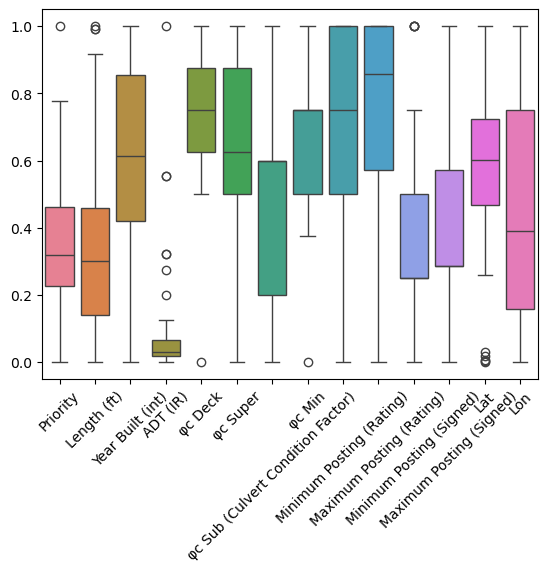

In [113]:
# Create a boxplot to visualize distribution of all numeric variables and detect any outliers

# plot 1 boxplot for all variables so must first normalize the scale
from sklearn.preprocessing import MinMaxScaler

# select numeric columns
num_columns = bridge_gdf[['Priority', 
                          'Length (ft)', 
                          #'Year Built (dt)', # No handling of datetime 
                          'Year Built (int)', 
                          'ADT (IR)', 
                          'φc Deck',
                          'φc Super', 
                          'φc Sub (Culvert Condition Factor)', 
                          'φc Min', 'Minimum Posting (Rating)',
                          'Maximum Posting (Rating)',
                          'Minimum Posting (Signed)', 
                          'Maximum Posting (Signed)', 
                          'Lat', 
                          'Lon',]]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create df with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()

3.2.4.2 Outlier investigation

In [116]:
# Determine the number of rows containing outliers for each variable that needs to be addressed

# Compute the 25th percentile value in `X_n`
percentile25 = bridge_gdf['Priority'].quantile(0.25)

# Compute the 75th percentile value in `X_n`
percentile75 = bridge_gdf['Priority'].quantile(0.75)

# Compute the interquartile range in `X_n`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `X_n`
outliers = bridge_gdf[(bridge_gdf['Priority'] > upper_limit) | (bridge_gdf['Priority'] < lower_limit)]

# Count how many rows in the data contain outliers in `X_n`
print("Number of rows in the data containing outliers in `Priority`:", len(outliers))

outliers

Lower limit: -0.23700000000000032
Upper limit: 3.3150000000000004
Number of rows in the data containing outliers in `Priority`: 1


,Recall No.,Name,Bridge Type,Class,Folder,Hyperlink,Road Name,Crossing,Priority,Pile Type,Length (ft),Year Built,Year Built (dt),Year Built (int),ADT (IR),φc Deck,φc Super,φc Sub (Culvert Condition Factor),φc Min,Rated By,Posting (Rating),Minimum Posting (Rating),Maximum Posting (Rating),Posting (Signed),Minimum Posting (Signed),Maximum Posting (Signed),Lat,Lon,Data QA/QC,geometry
20,101036,101036-Lod Stafford,TTTRES,TTTRES,Livingston Parish GIS Data\Bridges\Parish-Owne...,"<a href=""https:\halff-my.sharepoint.com\:f:\r\...",Lod Stafford Rd,Colyell Creek,4.009,Timber,56,1986,1986-01-01,1986,150.0,1.0,1.0,6.0,1.0,DOTD,Closed,NaN,NaN,10-15,10.0,15.0,30.522782,-90.755799,Initial Pass,POINT (-90.7558 30.52278)


3.2.4.3 Outlier Resolution

Certain types of models are more sensitive to outliers than others. At the time of model construction, consider whether to remove outliers based on the type of model being used
- **Delete them**: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.


In [ ]:
# use a boolean mask to delete outliers
mask = (df['number_of_strikes'] >= lower_limit) & (df['number_of_strikes'] <= upper_limit)

df = df[mask].copy()


- **Reassign them**: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
    1. **Create a floor and ceiling at a quantile:** For example, you could place walls at the 90th and 10th percentile of the distribution of data values. Any value above the 90% mark or below the 10% mark are changed to fit within the walls you set
    2. **Impute the average:** In some cases, it might be best to reassign all outlier values to match the median or mean value. This will ensure that your median and distribution are based solely on the non-outlier values, leaving the original outliers excluded.


In [ ]:
# floor and ceiling method

# Calculate 10th percentile
tenth_percentile = np.percentile(df['x_n'], 10)

# Calculate 90th percentile
ninetieth_percentile = np.percentile(df['x_n'], 90)

# Apply lambda function to replace outliers with thresholds defined above
df['x_n'] = df['x_n'].apply(lambda x: (
    tenth_percentile if x < tenth_percentile 
    else ninetieth_percentile if x > ninetieth_percentile 
    else x))

In [ ]:
# imputing the average

# Calculate median of all NON-OUTLIER values
median = np.median(df['number_of_strikes'][df['number_of_strikes'] >= lower_limit])

# Impute the median for all values < lower_limit
df['number_of_strikes'] = np.where(df['number_of_strikes'] < lower_limit, median, df['number_of_strikes'] )

- **Leave them**: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

Best practice dictates to check for outliers in all variables of interest to ensure the accuracy and validity of statistical analyses and machine learning models.

##### 3.2.5 Convert Categorical to Numeric Data

In [ ]:
# create list of columns that need to be encoded
columns_to_encode = ['x_1', 'x_2']

# instantiate new df from the encoded df
df2 = pd.get_dummies(df, columns=columns_to_encode)

df2.head()

##### 3.2.6 Check for class imbalance

**Class imbalance:** When a data has a predictor variable that contains more instances of one outcome than another

**Balancing a Dataset**
1. **Downsampling:**  the process of making the minority class represent a larger share of the whole dataset simply by removing observations from the majority class. It is mostly used with datasets that are large. 

2. **Upsampling:** is the opposite of downsampling, and is done when the dataset doesn’t have a very large number of observations in the first place. Instead of removing observations from the majority class, you increase the number of observations in the minority class.


In [ ]:
# to downsample data use the resample() function from the sklearn.utils module.

from sklearn.utils import resample

# Separate your data into majority and minority classes
majority_data = df[df['target_class'] == 0]  # majority class
minority_data = df[df['target_class'] == 1]  # minority class

# Downsample the majority class
downsampled_majority = resample(majority_data, replace=False, n_samples=len(minority_data), random_state=42)

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([downsampled_majority, minority_data])

# Check the class distribution of the downsampled data
downsampled_data['target_class'].value_counts()

In [ ]:
# To upsample data use the resample() function from the sklearn.utils module.

from sklearn.utils import resample

# Separate your data into majority and minority classes
majority_data = df[df['target_class'] == 0]  # majority class
minority_data = df[df['target_class'] == 1]  # minority class

# Upsample the minority class
upsampled_minority = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)

# Combine the upsampled minority class with the majority class
upsampled_data = pd.concat([majority_data, upsampled_minority])

# Check the class distribution of the upsampled data
upsampled_data['target_class'].value_counts()

---
<a name="4.-Joining"></a>
### 4. Joining

#### 4.1 Reference Guide

**Merging |** Method to combine two different data frames along a specified starting column


**Functions for combining data:**

| Function | Description |
| ---- | ---- |
`df.merge()` | A method available to the DataFrame class. <br> Use df.merge() to take columns or indices from other dataframes and combine them with the one to which you’re applying the method. |
`pd.concat()` | A pandas function to combine series and/or dataframes <br> Use pd.concat() to join columns, rows, or dataframes along a particular axis |
`df.join()` | A method available to the DataFrame class. <br> Use df.join() to combine columns with another dataframe either on an index or on a key column. Efficiently join multiple DataFrame objects by index at once by passing a list. |

#### 4.2 Code Cells

In [3]:
# Use this section to add data as required

---
<a name="5.-Validating"></a>
### 5. Validating

#### 5.1 Reference Guide


**Input Validation |** The practice of thoroughly analyzing and double-checking to make sure data is complete, error-free, and high-quality.

**Why validate data?:**
- Make more accurate business decisions
- Improve complex model performance 
- Prevent future system crashes, coding issues, or wrong predictions

**Questions to ask while validating data:**
- Are all entries in the same format?
- Are all entries in the same range? 
- Are the applicable data entries expressed in teh same data type?

#### 5.2 Code Cells

In [117]:
# Use this section to add data as required

---
<a name="6.-Presenting"></a>
### 6. Presenting

#### 6.1 Reference Guide



**Data visualization |** Refers to the graphical representation of data and information using visual elements such as charts, graphs, maps, and other visual aids. It is a way of presenting complex data in a visually appealing and easy-to-understand manner, allowing individuals to analyze and interpret patterns, trends, and relationships within the data.

**Data visualization serves multiple purposes, including:**

- Exploration and analysis: It helps in exploring and analyzing large datasets, enabling users to identify patterns, outliers, correlations, and insights that may not be immediately apparent in raw data.
- Communication and storytelling: Visualizing data enhances communication by presenting information in a concise and compelling manner. It allows individuals to effectively convey their findings, narratives, or arguments based on data to others.
- Decision-making: By presenting data visually, decision-makers can gain better insights and make informed decisions. Visual representations facilitate understanding and enable stakeholders to grasp complex information quickly.
- Identifying trends and patterns: Data visualizations help in identifying trends, patterns, and relationships between variables, enabling businesses and organizations to make data-driven decisions and predictions.
- Data exploration and hypothesis testing: Visualizations can aid in exploring data, formulating hypotheses, and testing assumptions. They provide a visual framework to analyze data from different angles and validate or invalidate hypotheses.

#### 6.2 Common Graphs

##### 6.2.1 Boxplots

- Box plots are very useful in visualizing distributions within data
- Can be deceiving without the context of the sample sizes that they represent 
    - Solution is to plot a stacked histogram alongside to visualize the distribution of data in boxplots

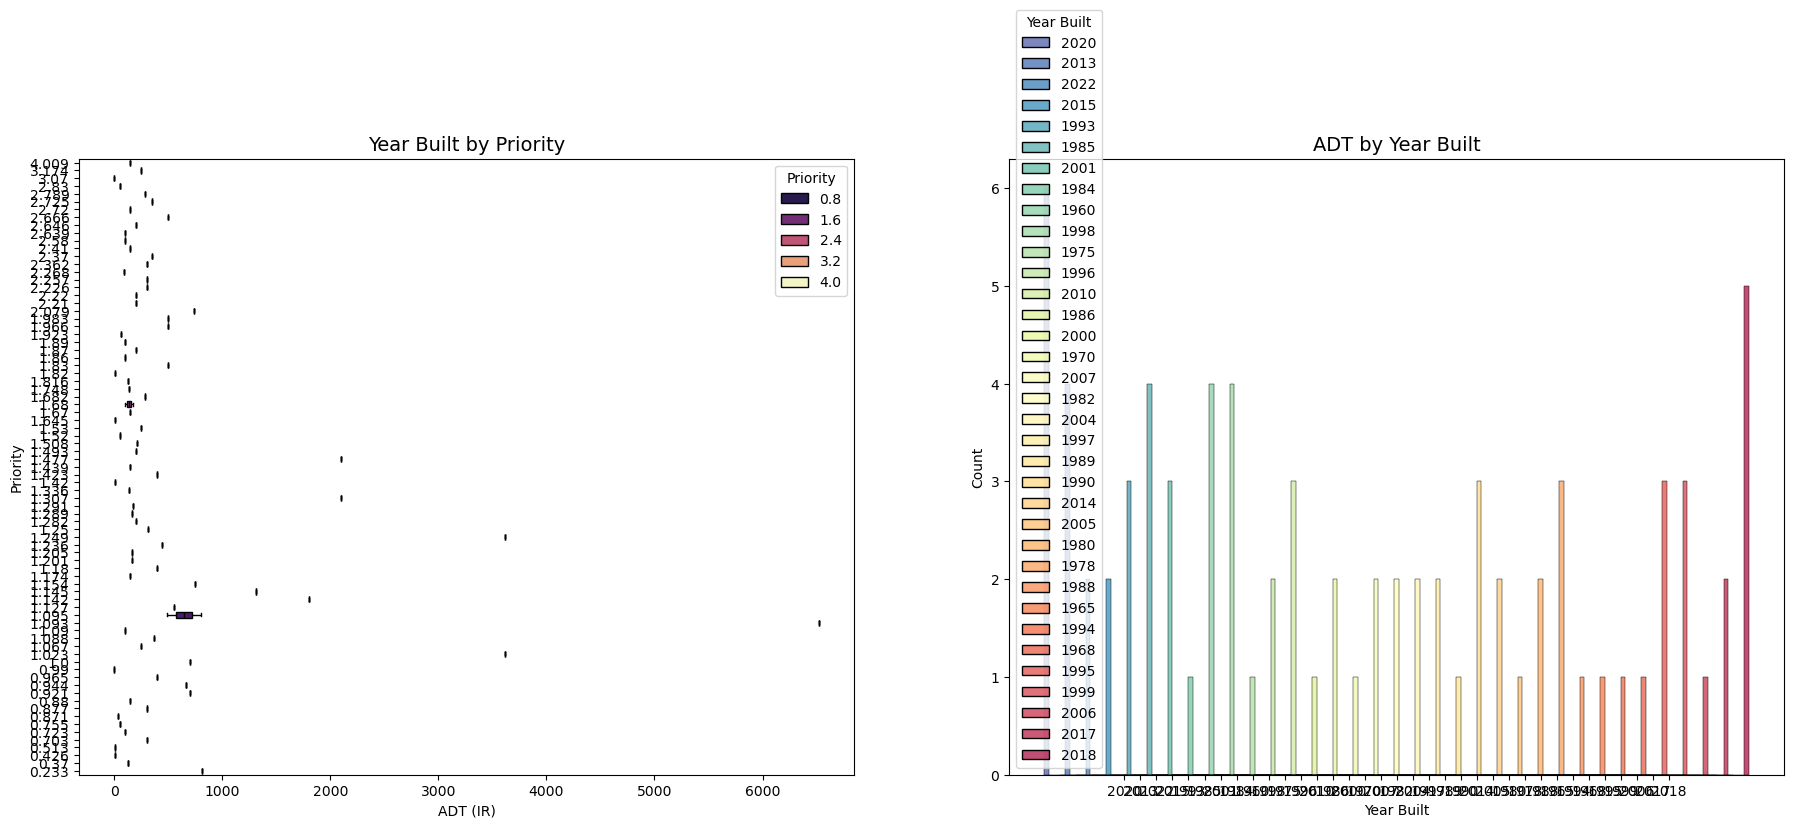

In [154]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot 
sns.boxplot(
    data=bridge_gdf, 
    x='ADT (IR)', 
    y='Priority', 
    hue='Priority',   # specifies the variable from the data to be used for grouping or coloring the histogram bars
    palette='magma',
    orient="h",                 # determines the orientation of the box plot. "h" refers to horizontal, so the box plots will be drawn horizontally.
    ax=ax[0]                    # specifies the axes object on which the histogram will be drawn. ax[1] refers to the second subplot or axes object.
)
ax[0].invert_yaxis()            # used to invert the y-axis. This is done to have the dependent variable values displayed in descending order on the y-axis.
ax[0].set_title('Year Built by Priority', fontsize='14')

# Create histogram showing distribution
sns.histplot(
    data= bridge_gdf,
    x='Year Built', 
    hue='Year Built',   # specifies the variable from the data to be used for grouping or coloring the histogram bars
    multiple='dodge',           # determines the method used to handle overlapping bars.'dodge' means the bars are positioned side by side for different values of 'Dependant Variable'
    palette='Spectral_r',
    shrink=10,                   # It controls the width of the bars. A higher value like 2 will make the bars narrower, while a lower value would make them wider.
    ax=ax[1]                    # specifies the axes object on which the histogram will be drawn. ax[1] refers to the second subplot or axes object.
)
ax[1].set_title('ADT by Year Built', fontsize='14')

# Display the plots
plt.show()

##### 6.2.2 Histograms


A histogram is a graphical representation that displays the distribution of a continuous variable by dividing the data into intervals (bins) and representing the frequency or count of observations within each bin using vertical bars.

ValueError: No objects to concatenate

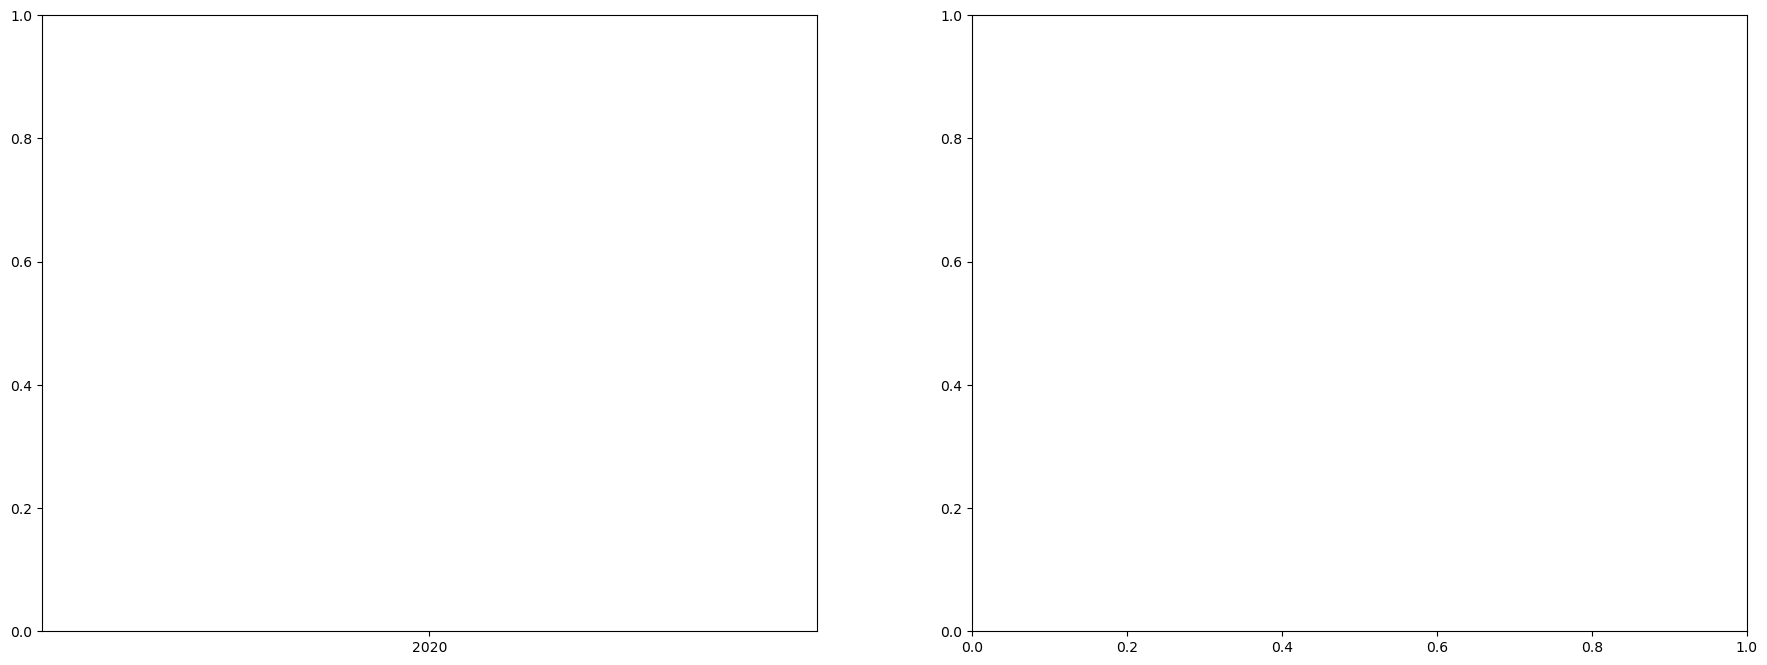

In [158]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define filtered data for plot 1
df_filter1 = bridge_gdf[bridge_gdf['Priority'] < 2]

# Define long-tenured employees
df_filter2 = bridge_gdf[bridge_gdf['Priority'] > 2]

# Plot 1 histogram
sns.histplot(
    data=df_filter1, 
    x='Year Built', 
    hue='Year Built', 
    discrete=1, 
    hue_order=['1', '2', '3'], 
    multiple='dodge', 
    shrink=.5, 
    ax=ax[0]
)
ax[0].set_title('Title', fontsize='14')

# Plot 2 histogram
sns.histplot(
    data=df_filter2, 
    x='ADT (IR)', 
    hue='Priority', 
    discrete=1, 
    hue_order=['1', '2', '3'], 
    multiple='dodge', 
    shrink=.5, 
    ax=ax[0]
)
ax[0].set_title('Title', fontsize='14')

##### 6.2.3 Scatterplots


A scatter plot is a graphical representation that displays the relationship or correlation between two continuous variables by plotting individual data points as dots on a two-dimensional coordinate system.

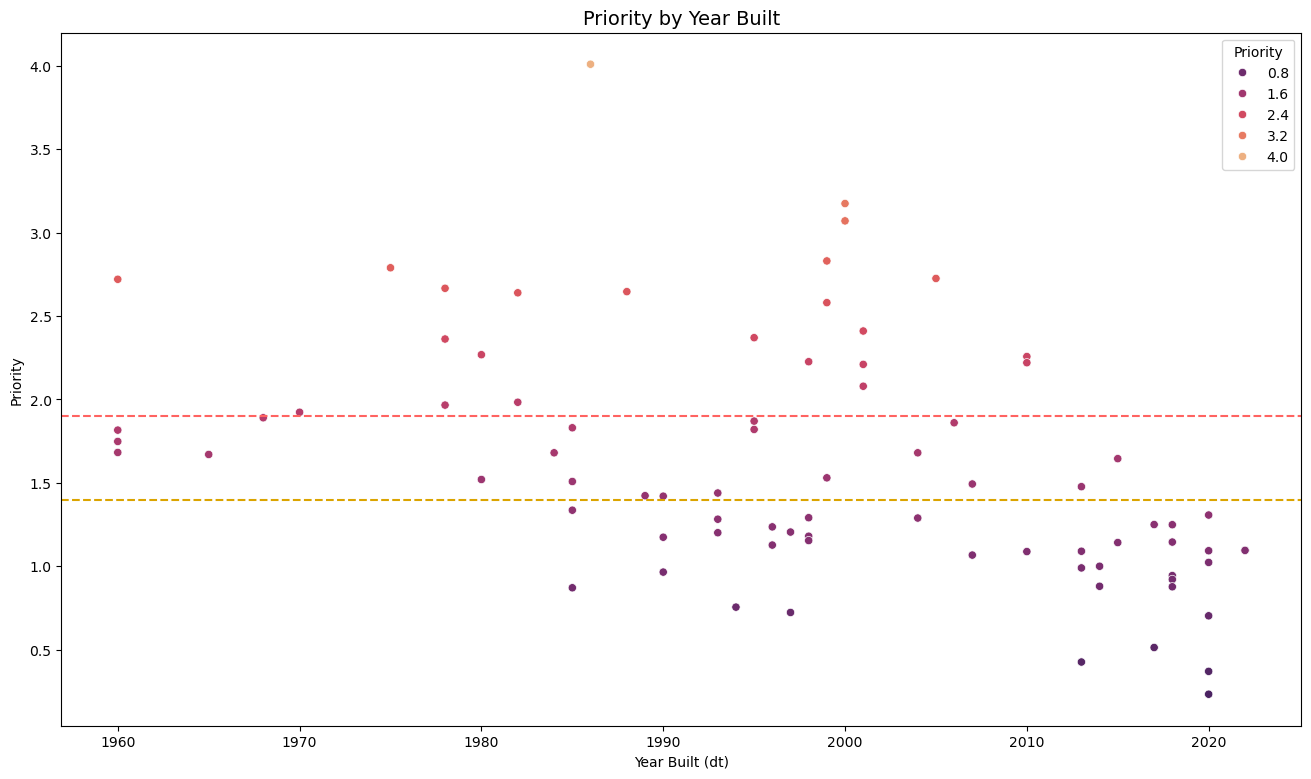

In [147]:
# Create scatterplot of `X_1` versus `X_2`
plt.figure(figsize=(16, 9))

sns.scatterplot(
    data=bridge_gdf, 
    x='Year Built (dt)', 
    y='Priority', 
    hue='Priority',
    palette='flare_r', 
    alpha=1
)
#plt.axvline(x=1, color='#ff6361', label='', ls='--')
plt.axhline(y=1.9, color='#ff6361', label='Cutoff', ls='--')
plt.axhline(y=1.4, color='#dba400', label='Cutoff', ls='--')
#plt.legend(labels=['name1', 'name2', 'name3'])

plt.title('Priority by Year Built', fontsize='14');

##### 6.2.4 Heatmaps (correlation)

Checks for strong correlations between variables in the data.

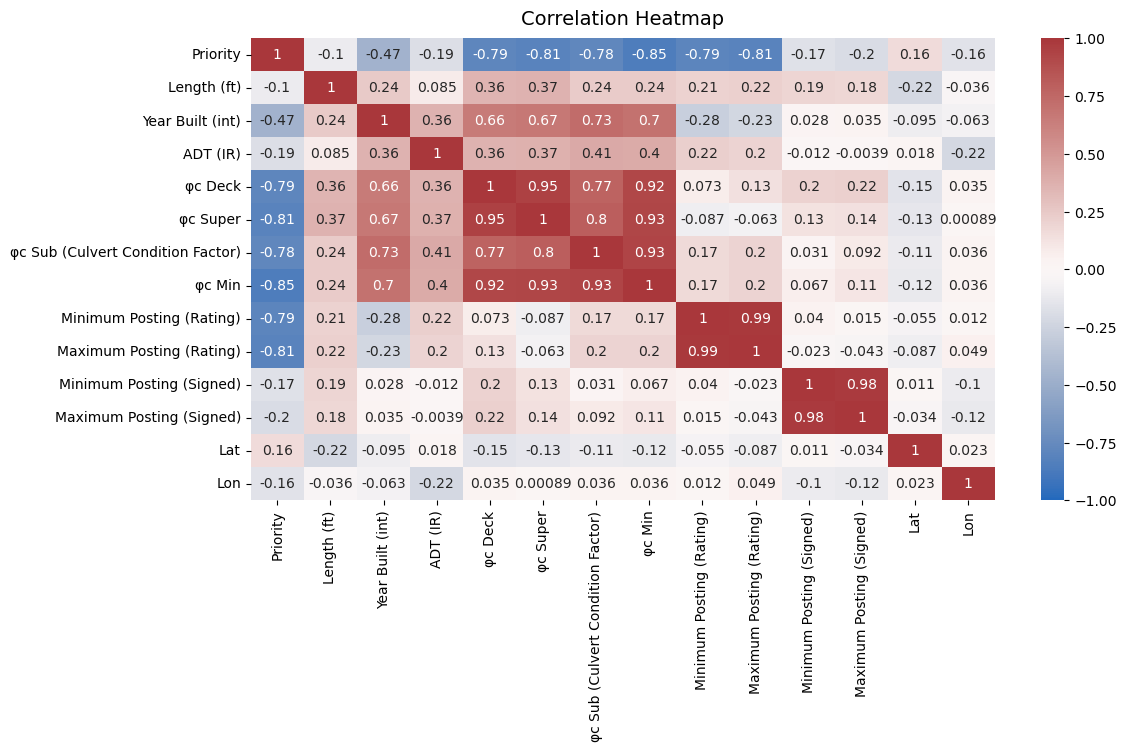

In [156]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 6))

heatmap = sns.heatmap(
    data= bridge_gdf.select_dtypes(include='number').corr(), 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap=sns.color_palette("vlag", as_cmap=True)
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=10);